In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [2]:
pip install transformers -U

In [3]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
from transformers import pipeline, AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
from datasets import load_dataset, load_metric
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

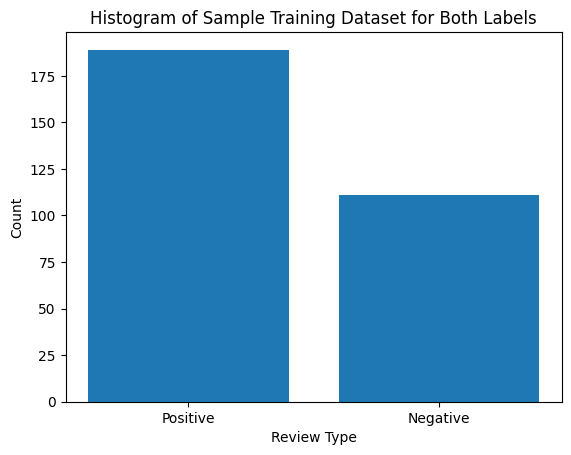

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


TrainOutput(global_step=76, training_loss=0.6443987896567897, metrics={'train_runtime': 24.8879, 'train_samples_per_second': 24.108, 'train_steps_per_second': 3.054, 'total_flos': 61961625721344.0, 'train_loss': 0.6443987896567897, 'epoch': 2.0})

In [5]:
#sampling the dataset
ds = load_dataset('yelp_review_full')

trained = ds['train']
tested = ds['test']

#sampling the dataset
sample_train_dataset = ds["train"].shuffle(seed=42).select([i for i in list(range(300))])
sample_test_dataset = ds["test"].shuffle(seed=42).select([i for i in list(range(300))])

#preprocessing the dataset
def convert_label(x):
  if x == 1 or x == 2:
    return 0
  else:
    return 1

sample_train_dataset = sample_train_dataset.map(lambda x: {'label': convert_label(x['label'])})
sample_test_dataset = sample_test_dataset.map(lambda x: {'label': convert_label(x['label'])})

#1. we will use distilbert tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

#2. prepare both splits
def preprocess_function(text):

  tokenized = tokenizer(text["text"], truncation=True)
  return tokenized

tokenized_train = sample_train_dataset.map(preprocess_function, batched=True)
tokenized_test = sample_test_dataset.map(preprocess_function, batched=True)

#Visualization  of negative and positive reviews

# labels to strings for plotting
labels = [str(label) for label in sample_train_dataset['label']]

#positive and negative reviews count
positive_count = labels.count('1')
negative_count = labels.count('0')

#histogram
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Histogram of Sample Training Dataset for Both Labels')
plt.show()


#representation
#1. we use a data-collator to for tensors and padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#pre-training
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

#1. evaluation metrics that will be used later
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

#2. training parameters and trainer


repo_name = "finetuning-sentiment-model-3000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   num_train_epochs=2,
   weight_decay=0.01,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

#3. train the sample dataset
trainer.train()

In [7]:
# Count the number of positive and negative reviews in the training sample
positive_reviews = len(sample_train_dataset.filter(lambda x: x['label'] == 1))
negative_reviews = len(sample_train_dataset.filter(lambda x: x['label'] == 0))

# Print the results
print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of negative reviews: {negative_reviews}")


Filter:   0%|          | 0/300 [00:00<?, ? examples/s]

Filter:   0%|          | 0/300 [00:00<?, ? examples/s]

Number of positive reviews: 189
Number of negative reviews: 111


In [6]:
#model evaluation/ optimization
#fine_tuning hyper-parameters to increase the accuracy
training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   num_train_epochs=2,
   weight_decay=0.01,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)
trainer.evaluate()

<ipython-input-5-efa23e9ceb4f>:59: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'eval_loss': 0.6276333928108215,
 'eval_accuracy': 0.63,
 'eval_f1': 0.7730061349693252,
 'eval_runtime': 142.4033,
 'eval_samples_per_second': 2.107,
 'eval_steps_per_second': 0.267}